In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
tf.random.set_seed(3782)

In [4]:
directory = "data/train"
class_names = ["normal","adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib","large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa","squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"]
class_labels = ["normal","adenocarcinoma","large cell carcinoma", "squamous cell carcinoma"]

In [5]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(directory = directory, labels = "inferred", class_names = class_names)

Found 613 files belonging to 4 classes.


In [6]:
test_labels = ["normal","adenocarcinoma","large.cell.carcinoma","squamous.cell.carcinoma"]
testing_data = tf.keras.preprocessing.image_dataset_from_directory(directory = "data/test", labels = "inferred", class_names = test_labels)

Found 315 files belonging to 4 classes.


In [7]:
val_labels = ["normal","adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib","large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa","squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"]
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory = "data/valid", labels = "inferred", class_names = val_labels)

Found 72 files belonging to 4 classes.


2024-07-08 15:51:06.244587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


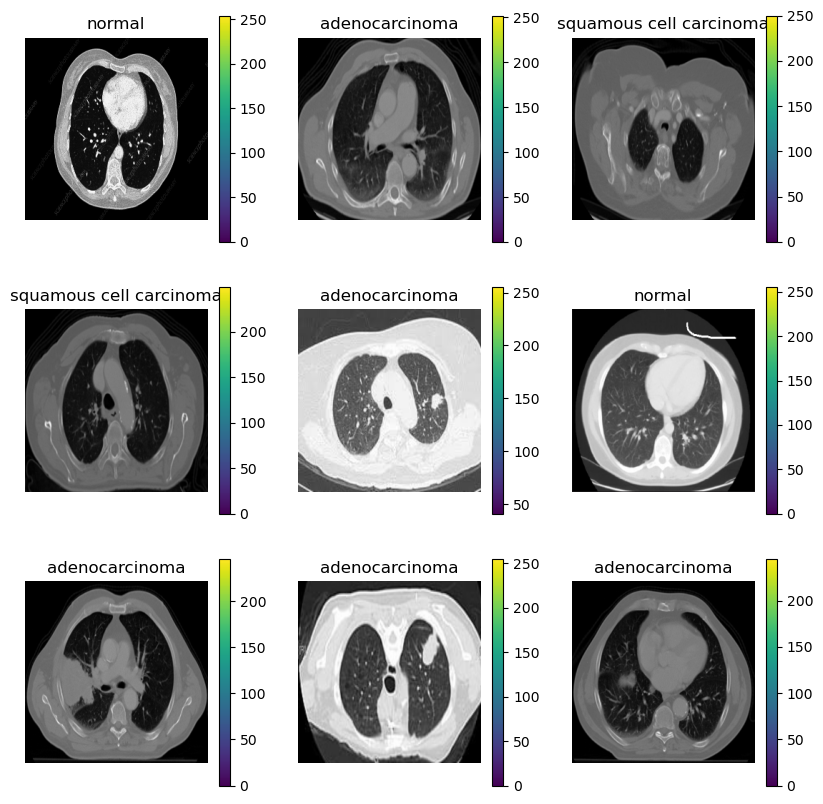

In [8]:
plt.figure(figsize=(10, 10)) #plot data
tf.random.set_seed(1)
for images, labels in training_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.title(class_labels[labels[i]])
    plt.axis("off")

(256, 256, 3)
Min and max pixel values: 0.0 224.89203


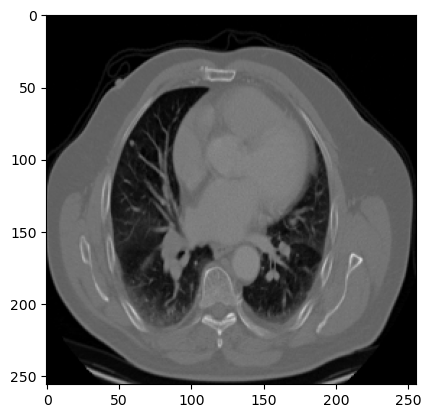

In [9]:
result = next(training_data.as_numpy_iterator()) #see a sample chest scan
print(result[0][0].shape)
print("Min and max pixel values:", (result[0][0]).min(), (result[0][0]).max())
plt.imshow((result[0][0]).astype("uint8"))

In [10]:
normalize = tf.keras.Sequential([ #normalization 
  layers.Rescaling(1./255,input_shape=(256, 256, 3)),
])

/Users/archan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


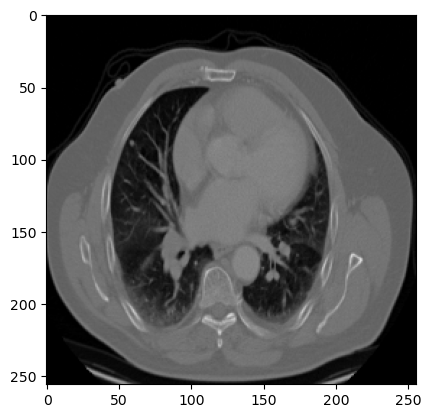

In [11]:

res = normalize(result) #show normalized picture
im = res[0].numpy()
plt.imshow(im)

In [12]:
result = next(iter(training_data))
im = normalize(result)
print(im[0].numpy().max()) #make sure it's actually normalized


0.99882007


In [13]:
augmentation = tf.keras.Sequential([ #augment training data
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
    layers.RandomCrop(240,240), 
    layers.RandomZoom((-0.1,0.1)),
])

In [14]:
it = training_data.as_numpy_iterator()
(next(it))[0].shape

(32, 256, 256, 3)

In [15]:
model = models.Sequential([ #define input tensor: 256x256 pixel image with 3 color channel
    tf.keras.Input(shape=(256,256,3),dtype="uint8"), 
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.add(normalize)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.add(augmentation)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 240, 240, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.add(layers.Conv2D(16,(3,3),activation="relu")) #convolution layer with 16 3x3 filters
model.add(layers.MaxPooling2D((2,2))) #2x2 max poolig layer
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448 (1.75 KB)

 Trainable params: 448 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,728 (38.00 KB)

 Trainable params: 9,728 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,192 (110.12 KB)

 Trainable params: 28,192 (110.12 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.add(layers.Flatten()) #flatten the model 
model.add(layers.Dense(16, activation="relu")) #add a layer of 16 neurons
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       401,424 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,616 (1.64 MB)

 Trainable params: 429,616 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.add(layers.Dense(16,activation="relu"))  
model.add(layers.Dense(4)) #condense to 4 output neurons
model.add(layers.Softmax()) #apply softmax to get "probabilities"
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       401,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,956 (1.64 MB)

 Trainable params: 429,956 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', #adam compiler is a stochastic gradient descent optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [24]:
import os

In [25]:
#create checkpoint for monitoring models which has the best running minimum validation loss
checkpoint_path = "training_1/mod.weights.h5" 
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=1,mode = "min")


In [26]:
epochs=10
history = model.fit( #fit model
  training_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks = [cp_callback]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.2963 - loss: 1.3661
Epoch 1: val_loss improved from inf to 1.38471, saving model to training_1/mod.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.2986 - loss: 1.3654 - val_accuracy: 0.4167 - val_loss: 1.3847
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.4343 - loss: 1.2435
Epoch 2: val_loss improved from 1.38471 to 0.95179, saving model to training_1/mod.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - accuracy: 0.4363 - loss: 1.2416 - val_accuracy: 0.5972 - val_loss: 0.9518
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.5660 - loss: 1.0427
Epoch 3: val_loss improved from 0.95179 to 0.81599, saving model to training_1/mod.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step - accuracy: 0.5657 - loss: 1.0404 - val_accuracy: 0.6667 - val_loss: 0.8160
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.6102 - loss: 0.9350
Epoch 4: val_loss did not i

In [27]:
os.listdir(checkpoint_dir)

['mod3.weights.h5',
 'mod.weights.h5',
 'mod_best.weights.h5',
 'mod_best_resplit.weights.h5']

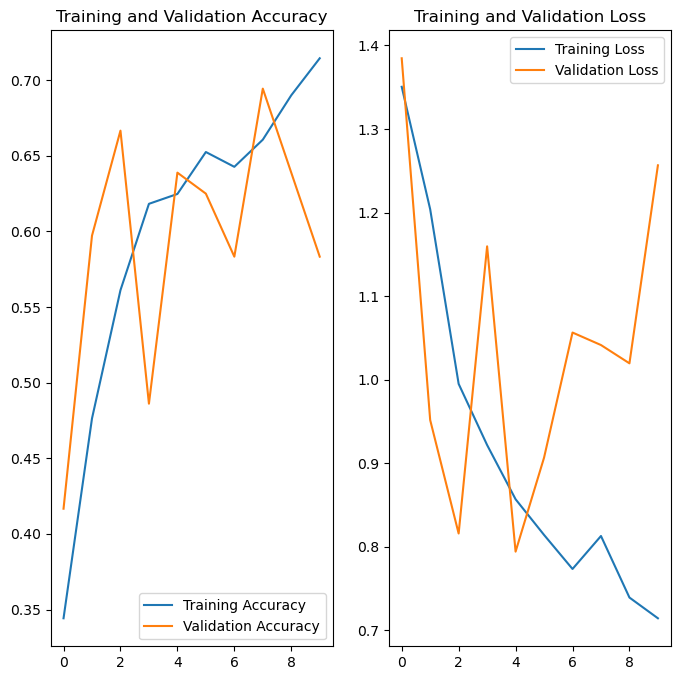

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
model.load_weights(checkpoint_path) #load weigths

# Re-evaluate the model
loss, acc = model.evaluate(testing_data, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 1s - 113ms/step - accuracy: 0.2381 - loss: 2.8688
Restored model, accuracy: 23.81%


In [30]:
import keras_tuner as kt

In [31]:
def hypertuned_mod_builder(hp):
    # create the model
    mod = models.Sequential()
    #input
    mod.add(tf.keras.Input(shape=(256,256,3), dtype= "uint8"))
    # standardize
    mod.add(layers.Rescaling(1./255,input_shape=(256, 256, 3)))
    # data augmentation steps - no need for hypertuning
    mod.add(layers.RandomRotation(0.1))
    mod.add(layers.RandomContrast(0.1))
    mod.add(layers.RandomCrop(240,240))
    mod.add(layers.RandomZoom((-0.1,0.1)))

    #first convolutional and pooling layers - tune number of filters and filter size
    hp_nfilters_1 = hp.Int("filters1",min_value = 32,max_value = 128,step = 32)
    hp_filtersize_1 = hp.Choice("kernel_size1",values = [3,4,5])
    mod.add(layers.Conv2D(filters=hp_nfilters_1,kernel_size=hp_filtersize_1,activation="relu"))
    mod.add(layers.MaxPooling2D((2,2)))

    #second convolutional and pooling layers - tune number of filters and filter size
    hp_nfilters_2 = hp.Int("filter2",min_value = 32,max_value = 128,step = 32)
    hp_filtersize_2 = hp.Choice("kernel_size2",values = [3,4,5])
    mod.add(layers.Conv2D(filters=hp_nfilters_2,kernel_size=hp_filtersize_2,activation="relu"))
    mod.add(layers.MaxPooling2D((2,2)))

    #third convolutional and pooling layers - tune number of filters and filter size
    hp_nfilters_3 = hp.Int("filters3",min_value = 32,max_value = 128,step = 32)
    hp_filtersize_3 = hp.Choice("kernel_size3",values = [3,4,5])
    mod.add(layers.Conv2D(filters=hp_nfilters_3,kernel_size=hp_filtersize_3,activation="relu"))
    mod.add(layers.MaxPooling2D((2,2)))

    # flatten and dense layer
    mod.add(layers.Flatten())
    hp_units_4 = hp.Int("units1",min_value = 10,max_value = 100,step = 10)
    mod.add(layers.Dense(units=hp_units_4, activation="relu"))

    #last dense layer before output
    hp_units_5 = hp.Int("units2",min_value = 10,max_value = 100,step = 10)
    mod.add(layers.Dense(units=hp_units_5,activation="relu"))
    mod.add(layers.Dense(4))
    mod.add(layers.Softmax())

    # compile
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    mod.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

    return mod


In [32]:
tuner = kt.Hyperband(hypertuned_mod_builder, #define hyperband tuner
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=4,
                     directory='hyper_tuning',
                     project_name='chest_cancer_proj')

/Users/archan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) 
#stops search if validation loss hasn't improved after 3 epochs

In [34]:
tuner.search(training_data, validation_data=val_data, epochs=50, callbacks=[stop_early])

Trial 44 Complete [00h 14m 27s]

Best val_accuracy So Far: 0.75
Total elapsed time: 04h 45m 46s


In [35]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps)

In [36]:
mod_best = tuner.hypermodel.build(best_hps)
mod_best.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

/Users/archan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
checkpoint_path = "training_1/mod_best.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=1,mode = "min")

In [38]:
history_best = mod_best.fit(training_data,validation_data = val_data, epochs=100,callbacks = [cp_callback])


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.2642 - loss: 2.7224
Epoch 1: val_loss improved from inf to 1.36902, saving model to training_1/mod_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 160s 8s/step - accuracy: 0.2647 - loss: 2.6838 - val_accuracy: 0.4028 - val_loss: 1.3690
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3816 - loss: 1.3128
Epoch 2: val_loss did not improve from 1.36902
20/20 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step - accuracy: 0.3837 - loss: 1.3102 - val_accuracy: 0.3750 - val_loss: 1.4550
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5074 - loss: 1.1685
Epoch 3: val_loss improved from 1.36902 to 1.01226, saving model to training_1/mod_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 131s 7s/step - accuracy: 0.5082 - loss: 1.1651 - val_accuracy: 0.5417 - val_loss: 1.0123
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5839 - loss: 1.0167
Epoch 4: val_loss improved from 1.01226 to 0.94530, saving model to trainin

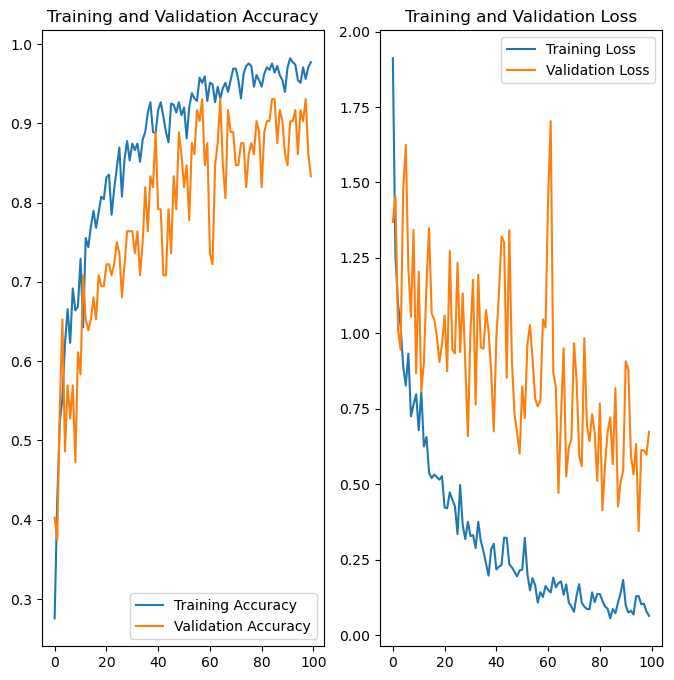

In [39]:
acc = history_best.history['accuracy']
val_acc = history_best.history['val_accuracy']

loss = history_best.history['loss']
val_loss = history_best.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
mod_best.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = mod_best.evaluate(testing_data, verbose=2)
print("Best model, testing accuracy: {:5.2f}%".format(100 * acc))

10/10 - 13s - 1s/step - accuracy: 0.5143 - loss: 2.9503
Best model, testing accuracy: 51.43%


In [126]:
directory = "data/all_data"
all_data_labels = ["adenocarcinoma","large.cell.carcinoma","normal","squamous.cell.carcinoma"]
all_data = tf.keras.preprocessing.image_dataset_from_directory(directory = directory, labels = "inferred", class_names = all_data_labels,batch_size=None, shuffle = True, seed = 1421)

Found 1000 files belonging to 4 classes.


In [127]:
all_data.shuffle(buffer_size = 1000, seed = 8732)

<_ShuffleDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [128]:
all_data_list = list(all_data.as_numpy_iterator())
images,labels = zip(*all_data_list)
images = np.stack(images)
labels = np.stack(labels)


2024-07-09 14:33:44.608305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [129]:
from sklearn.model_selection import train_test_split

train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)


In [130]:
def make_tf_dataset(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    return dataset.batch(batch_size=32,drop_remainder=False)
    

In [131]:
training_resplit = make_tf_dataset(train_images, train_labels)
validation_resplit = make_tf_dataset(val_images, val_labels)
testing_resplit = make_tf_dataset(test_images, test_labels)

# Optional: Shuffle the datasets
training_resplit = training_resplit.shuffle(buffer_size=22, seed=34, reshuffle_each_iteration=True)
validation_resplit = validation_resplit.shuffle(buffer_size=5, seed=432, reshuffle_each_iteration=True)
testing_resplit = testing_resplit.shuffle(buffer_size=5, seed=53, reshuffle_each_iteration=True)

In [132]:
tuner_resplit = kt.Hyperband(hypertuned_mod_builder, #define hyperband tuner
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=4,
                     directory='hyper_tuning_resplit',
                     project_name='chest_cancer_proj')

stop_resplit = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) 


/Users/archan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [133]:
tuner_resplit.search(training_resplit, validation_data=validation_resplit, epochs=50, callbacks=[stop_resplit])

Trial 44 Complete [00h 03m 28s]
val_accuracy: 0.3466666638851166

Best val_accuracy So Far: 0.8266666531562805
Total elapsed time: 03h 55m 18s


In [134]:
best_hps=tuner_resplit.get_best_hyperparameters(num_trials=1)[0]
mod_best = tuner_resplit.hypermodel.build(best_hps)
mod_best.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
checkpoint_path = "training_1/mod_best_resplit.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=1,mode = "min")
history_best = mod_best.fit(training_resplit,validation_data = validation_resplit, epochs=100,callbacks = [cp_callback])


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2842 - loss: 1.4492
Epoch 1: val_loss improved from inf to 1.08410, saving model to training_1/mod_best_resplit.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.2875 - loss: 1.4448 - val_accuracy: 0.4267 - val_loss: 1.0841
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4770 - loss: 1.1382
Epoch 2: val_loss improved from 1.08410 to 0.83935, saving model to training_1/mod_best_resplit.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.4783 - loss: 1.1362 - val_accuracy: 0.6400 - val_loss: 0.8393
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5246 - loss: 1.0279
Epoch 3: val_loss did not improve from 0.83935
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.5251 - loss: 1.0283 - val_accuracy: 0.6333 - val_loss: 0.9175
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6014 - loss: 0.9305
Epoch 4: val_loss improved from 0.83935 to 0.74422, saving mod

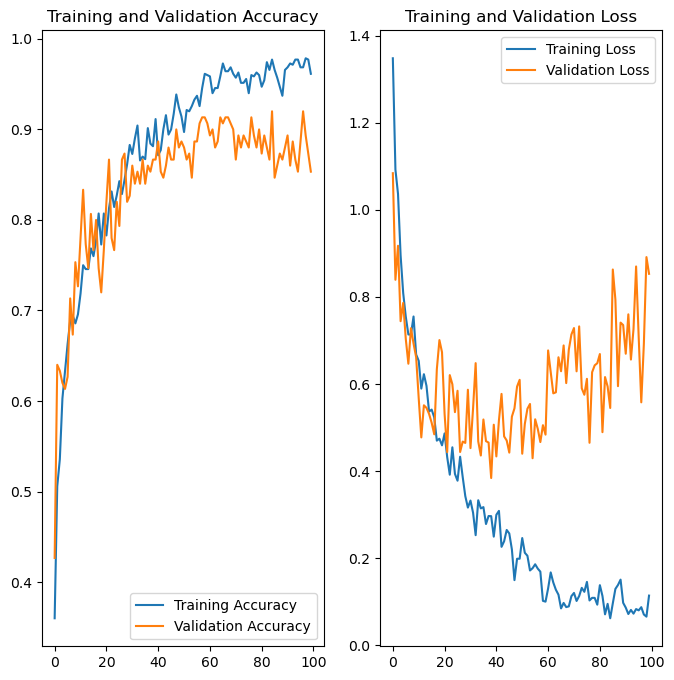

In [135]:
acc = history_best.history['accuracy']
val_acc = history_best.history['val_accuracy']

loss = history_best.history['loss']
val_loss = history_best.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [136]:
mod_best.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = mod_best.evaluate(testing_resplit, verbose=2)
print("Best model, testing accuracy: {:5.2f}%".format(100 * acc))

5/5 - 3s - 650ms/step - accuracy: 0.8600 - loss: 0.3419
Best model, testing accuracy: 86.00%
